In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

The proposed dataset is the MNIST database. 
These are composed of 70.000 28x28 pixel gray-scale images of handwritten digits: 60.000 images for the training set and 10.000 images for the test set

In [18]:
from sklearn.datasets import fetch_openml
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = X/255.

c:\Users\Serena\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Let's see how images look like!

In [19]:
def plot_digits(iter = 10):
    
    fig, axs = plt.subplots(10,iter)
    
    for digit in range(10):
        for x in range(iter):
            digit_index = y[y == digit].index[x]

            digit_pixels = np.array(X.iloc[digit_index]).reshape(28, 28)
            axs[digit,x].imshow(digit_pixels)
            axs[digit,x].axis('off')

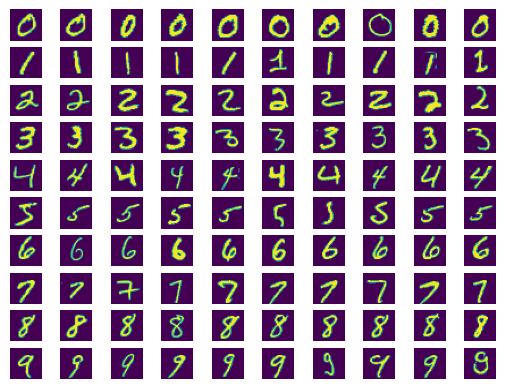

In [20]:
plot_digits()

In [21]:
# In this snippet, all the columns where the minumim and the maximum value coincides (they have a single value) are dropped 
rows, cols = X.shape
print("Before dropping: ", X.shape)
for i in range(cols):
    col_name = 'pixel' + str(i + 1)
    if min(X[col_name]) == max(X[col_name]):
        X.drop(col_name, axis = 1, inplace = True)
print("After dropping: ", X.shape)
        

Before dropping:  (70000, 784)
After dropping:  (70000, 719)


In [22]:
# Splitting the dataframe in training and test set: the first with 60.000 instances, the second with 10.000 instances
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, random_state = 42, stratify = y)
print("Train: ", X_train.shape)
print("Test: ", X_test.shape)

Train:  (60000, 719)
Test:  (10000, 719)


In [23]:
# Let's get a smaller training set with which calculate the best value for the hyper-parameters 
X_train_small, X_ignore, y_train_small, y_ignore = train_test_split(X_train, y_train, train_size = 15000, random_state = 42, stratify = y_train)
print("Train small: ", X_train_small.shape)

Train small:  (15000, 719)


In [24]:
# Transforming each DataFrame in a csv file
X_train.to_csv(r'X_train.csv',index = False)
y_train.to_csv(r'y_train.csv',index = False)

X_train_small.to_csv(r'X_train_small.csv',index = False)
y_train_small.to_csv(r'y_train_small.csv',index = False)

X_test.to_csv(r'X_test.csv',index = False)
y_test.to_csv(r'y_test.csv',index = False)